In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
!pip install scipy==1.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [76]:
# GrQc = nx.read_edgelist("/content/CA-GrQc.txt", create_using=nx.Graph())
# WikiVote = nx.read_edgelist("/content/Wiki-Vote.txt", create_using=nx.DiGraph())
# p2p = nx.read_edgelist("/content/p2p-Gnutella08.txt", create_using=nx.DiGraph())
fb = nx.read_edgelist("/content/facebook_combined.txt", create_using=nx.Graph())

# pos_GrQc = nx.spring_layout(GrQc, seed=23)
# pos_wv = nx.spring_layout(WikiVote, seed=23)
# pos_p2p = nx.spring_layout(p2p, seed=23)
pos_fb = nx.spring_layout(fb, seed=23)

# count the number of nodes
# GrQc.number_of_nodes()
# WikiVote.number_of_nodes()
# p2p.number_of_nodes()
fb.number_of_nodes()

4039

In [77]:
from networkx.classes.function import is_directed
def centrality_measures(g):
    d_cent = nx.degree_centrality(g) # this is normalized by default
    c_cent = nx.closeness_centrality(g) # this is normalized by default
    b_cent = nx.betweenness_centrality(g)
    e_cent = nx.eigenvector_centrality(g)
    h_cent = nx.harmonic_centrality(g)
    pr = nx.pagerank(g) # alpha is 0.85 by default, we can change it.
    clus_coeff = nx.clustering(g)
    # these are all dictionaries from nodes to their centrality value (or other variables).
    if nx.is_directed(g):
      in_cent = nx.in_degree_centrality(g)
      out_cent = nx.out_degree_centrality(g)
    else:
      in_cent = 0
      out_cent = 0
      
    return d_cent, c_cent, b_cent, e_cent, h_cent, pr, clus_coeff, in_cent, out_cent

In [78]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=2, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(measure_name+'.png', format='png')
    plt.show()


def plot_hist(measure, measure_name):
    plt.hist(list(measure.values()))
    plt.title(measure_name)
    # plt.axis('off')
    plt.savefig(measure_name+'hist.png', format='png')
    plt.show()

# Dataset 1: GrQc

In [ ]:
# Computing centralities
d_cent, c_cent, b_cent, e_cent, h_cent, pr, clus_coeff, in_cent, out_cent = centrality_measures(GrQc)

In [ ]:
# Some other measurements for better understanding

num_triangles = nx.triangles(GrQc)
number_of_triangles = sum(num_triangles.values()) / 3
print('Total number of triangles:' + str(number_of_triangles))

if nx.has_bridges(GrQc):
  print('\nGraph has bridges!\n')
  all_bridges = nx.bridges(GrQc)

largest_cc = max(nx.connected_components(GrQc), key=len)

p = dict(nx.shortest_path_length(GrQc))

48260.0


In [ ]:
# Largest strongly connected component
GrQc0 = GrQc.subgraph(largest_cc)
pos_lcc = nx.spring_layout(GrQc0, seed=23)

In [ ]:
# Some insights on largest connected component
radius = nx.radius(GrQc0)
center = nx.center(GrQc0)
diameter = nx.diameter(GrQc0)
eccentricity = nx.eccentricity(GrQc0)

In [ ]:
print(GrQc0.number_of_nodes())
print(GrQc0.number_of_edges())

4158

In [ ]:
# Visualization
draw(GrQc, pos_GrQc, d_cent, 'Degree Centrality for GrQc')
draw(GrQc, pos_GrQc, c_cent, 'Closeness Centrality for GrQc')
draw(GrQc, pos_GrQc, b_cent, 'Betweenness Centrality for GrQc')
draw(GrQc, pos_GrQc, e_cent, 'Eigenvector Centrality for GrQc')
draw(GrQc, pos_GrQc, pr, 'PageRank for GrQc')
draw(GrQc, pos_GrQc, clus_coeff, 'Clustering Coefficient for GrQc')

plot_hist(d_cent, 'Degree Centrality for GrQc')
plot_hist(c_cent, 'Closeness Centrality for GrQc')
plot_hist(b_cent, 'Betweenness Centrality for GrQc')
plot_hist(e_cent, 'Eigenvector Centrality for GrQc')
plot_hist(pr, 'PageRank for GrQc')
plot_hist(clus_coeff, 'Clustering Coefficient for GrQc')

# Dataset 2: Wiki vote

In [22]:
# Computing centralities
d_cent, c_cent, b_cent, e_cent, h_cent, pr, clus_coeff, in_cent, out_cent = centrality_measures(WikiVote)

In [40]:
# Some other measurements for better understanding

largest_wcc = max(nx.weakly_connected_components(WikiVote), key=len)
largest_scc = max(nx.strongly_connected_components(WikiVote), key=len)

In [47]:
# Largest weakly/strongly connected component
WikiVote0 = WikiVote.subgraph(largest_wcc)
WikiVote1 = WikiVote.subgraph(largest_scc)

In [ ]:
# Some insights on largest connected component
radius = nx.radius(WikiVote0)
center = nx.center(WikiVote0)
diameter = nx.diameter(WikiVote0)
eccentricity = nx.eccentricity(WikiVote0)

In [45]:
# Finding number of triangles in the directed graph
# cycls_3 = [c for c in nx.simple_cycles(WikiVote) if len(c)==3]
# Very inefficient, couldn't finish!!!

In [46]:
# print(len(cycls_3))

In [48]:
print('Fraction of nodes in the largest weakly connected component: ' + str(WikiVote0.number_of_nodes() / WikiVote.number_of_nodes()))
print('Fraction of edges in the largest weakly connected component: ' + str(WikiVote0.number_of_edges() / WikiVote.number_of_edges()))
print('Fraction of nodes in the largest strongly connected component: ' + str(WikiVote1.number_of_nodes() / WikiVote.number_of_nodes()))
print('Fraction of edges in the largest strongly connected component: ' + str(WikiVote1.number_of_edges() / WikiVote.number_of_edges()))

Fraction of nodes in the largest weakly connected component: 0.9931131412508785
Fraction of edges in the largest weakly connected component: 0.9997492501615408
Fraction of nodes in the largest strongly connected component: 0.18271257905832747
Fraction of edges in the largest strongly connected component: 0.3805225240864508


In [ ]:
# Visualization

plot_hist(d_cent, 'Degree Centrality for WikiVote')
plot_hist(c_cent, 'Closeness Centrality for WikiVote')
plot_hist(b_cent, 'Betweenness Centrality for WikiVote')
plot_hist(e_cent, 'Eigenvector Centrality for WikiVote')
plot_hist(h_cent, 'Harmonic Centrality for WikiVote')
plot_hist(pr, 'PageRank for WikiVote')
plot_hist(clus_coeff, 'Clustering Coefficient for WikiVote')
plot_hist(in_cent, 'In-Degree Centrality for WikiVote')
plot_hist(out_cent, 'Out-Degree Centrality for WikiVote')

# Dataset 3: p2p-Gnutella08


In [61]:
# Computing centralities
d_cent, c_cent, b_cent, e_cent, h_cent, pr, clus_coeff, in_cent, out_cent = centrality_measures(p2p)

In [68]:
# Largest weakly/strongly connected component
largest_wcc = max(nx.weakly_connected_components(p2p), key=len)
largest_scc = max(nx.strongly_connected_components(p2p), key=len)

p2p0 = p2p.subgraph(largest_wcc)
p2p1 = p2p.subgraph(largest_scc)

In [69]:
print('Fraction of nodes in the largest weakly connected component: ' + str(p2p0.number_of_nodes() / p2p.number_of_nodes()))
print('Fraction of edges in the largest weakly connected component: ' + str(p2p0.number_of_edges() / p2p.number_of_edges()))
print('Fraction of nodes in the largest strongly connected component: ' + str(p2p1.number_of_nodes() / p2p.number_of_nodes()))
print('Fraction of edges in the largest strongly connected component: ' + str(p2p1.number_of_edges() / p2p.number_of_edges()))

Fraction of nodes in the largest weakly connected component: 0.999682590065069
Fraction of edges in the largest weakly connected component: 0.9999518698560909
Fraction of nodes in the largest strongly connected component: 0.3282018727186161
Fraction of edges in the largest strongly connected component: 0.4482360302257304


In [71]:
# Some insights on the largest strongly connected component
radius = nx.radius(p2p1) 
center = nx.center(p2p1)
diameter = nx.diameter(p2p1)
eccentricity = nx.eccentricity(p2p1)

In [74]:
print('radius of largest strongly connected component is: ' + str(radius))
print('diameter of largest strongly connected component is: ' + str(diameter))
print('center of largest strongly connected component are: ' + str(center))

radius of largest strongly connected component is: 12
diameter of largest strongly connected component is: 19
center of largest strongly connected component are: ['4137', '112', '5680', '5078', '5727', '4639', '5168', '703', '3558', '4805', '6258', '2293', '3247', '1377', '4140', '1534']


In [ ]:
# Visualization
draw(p2p, pos_p2p, d_cent, 'Degree Centrality for p2p')
draw(p2p, pos_p2p, c_cent, 'Closeness Centrality for p2p')
draw(p2p, pos_p2p, b_cent, 'Betweenness Centrality for p2p')
draw(p2p, pos_p2p, e_cent, 'Eigenvector Centrality for p2p')
draw(p2p, pos_p2p, h_cent, 'Eigenvector Centrality for p2p')
draw(p2p, pos_p2p, pr, 'PageRank for p2p')
draw(p2p, pos_p2p, clus_coeff, 'Clustering Coefficient for p2p')
draw(p2p, pos_p2p, in_cent, 'In-Degree Centrality for p2p')
draw(p2p, pos_p2p, out_cent, 'Out-Degree Centrality for p2p')

plot_hist(d_cent, 'Degree Centrality for p2p')
plot_hist(c_cent, 'Closeness Centrality for p2p')
plot_hist(b_cent, 'Betweenness Centrality for p2p')
plot_hist(e_cent, 'Eigenvector Centrality for p2p')
plot_hist(h_cent, 'Harmonic Centrality for p2p')
plot_hist(pr, 'PageRank for p2p')
plot_hist(clus_coeff, 'Clustering Coefficient for p2p')
plot_hist(in_cent, 'In-Degree Centrality for p2p')
plot_hist(out_cent, 'Out-Degree Centrality for p2p')

# Dataset 4: Social circles, Facebook

In [79]:
# Computing centralities
d_cent, c_cent, b_cent, e_cent, h_cent, pr, clus_coeff, in_cent, out_cent = centrality_measures(fb)

In [80]:
# Some other measurements for better understanding

num_triangles = nx.triangles(fb)
number_of_triangles = sum(num_triangles.values()) / 3
print('Total number of triangles:' + str(number_of_triangles))

if nx.has_bridges(fb):
  print('\nGraph has bridges!\n')
  all_bridges = nx.bridges(fb)

largest_cc = max(nx.connected_components(fb), key=len)

p = dict(nx.shortest_path_length(fb))

Total number of triangles:1612010.0

Graph has bridges!



In [81]:
# Largest strongly connected component
fb0 = fb.subgraph(largest_cc)
pos_lcc = nx.spring_layout(fb0, seed=23)

In [84]:
# Some insights on graph
radius = nx.radius(fb)
center = nx.center(fb)
diameter = nx.diameter(fb)
eccentricity = nx.eccentricity(fb)
print('radius of network is: ' + str(radius))
print('diameter of network is: ' + str(diameter))

radius of network is: 4
diameter of network is: 8


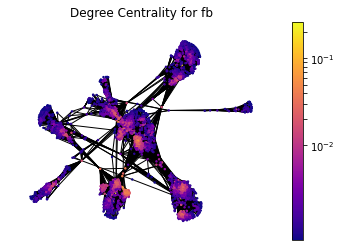

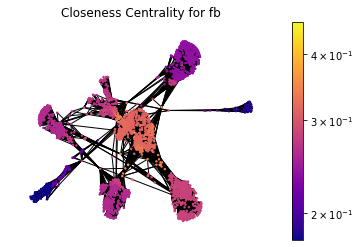

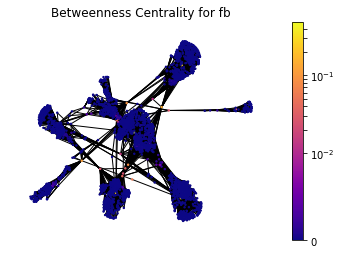

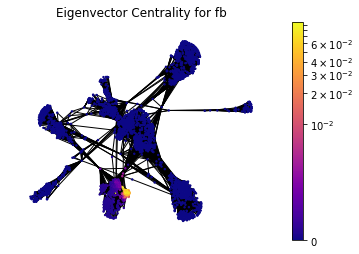

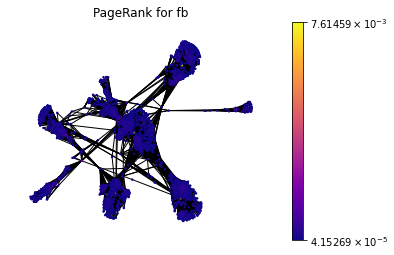

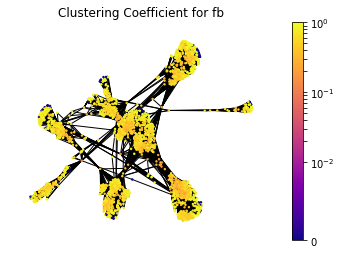

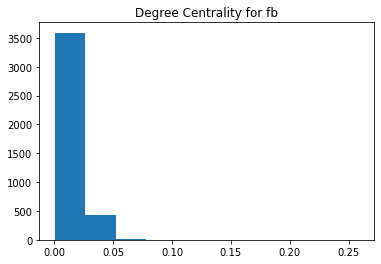

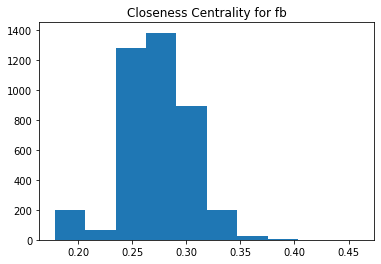

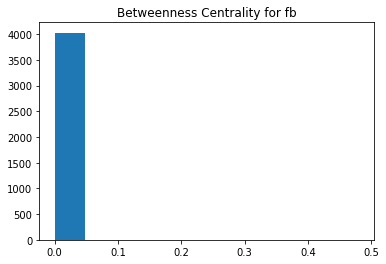

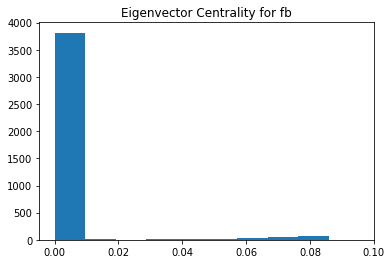

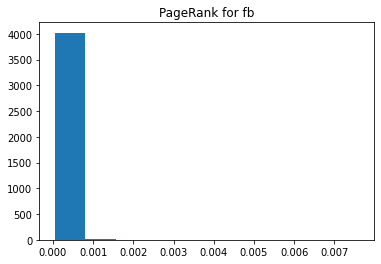

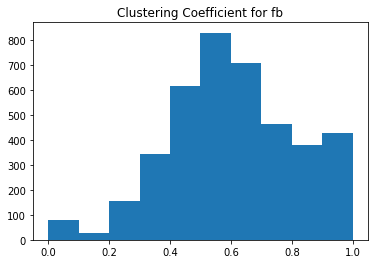

In [85]:
# Visualization
draw(fb, pos_fb, d_cent, 'Degree Centrality for fb')
draw(fb, pos_fb, c_cent, 'Closeness Centrality for fb')
draw(fb, pos_fb, b_cent, 'Betweenness Centrality for fb')
draw(fb, pos_fb, e_cent, 'Eigenvector Centrality for fb')
draw(fb, pos_fb, pr, 'PageRank for fb')
draw(fb, pos_fb, clus_coeff, 'Clustering Coefficient for fb')

plot_hist(d_cent, 'Degree Centrality for fb')
plot_hist(c_cent, 'Closeness Centrality for fb')
plot_hist(b_cent, 'Betweenness Centrality for fb')
plot_hist(e_cent, 'Eigenvector Centrality for fb')
plot_hist(pr, 'PageRank for fb')
plot_hist(clus_coeff, 'Clustering Coefficient for fb')

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(fb)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in fb:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(fb, node_color=color_map, with_labels=True)
plt.show()